<a href="https://colab.research.google.com/github/guangyoung/test2/blob/main/test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

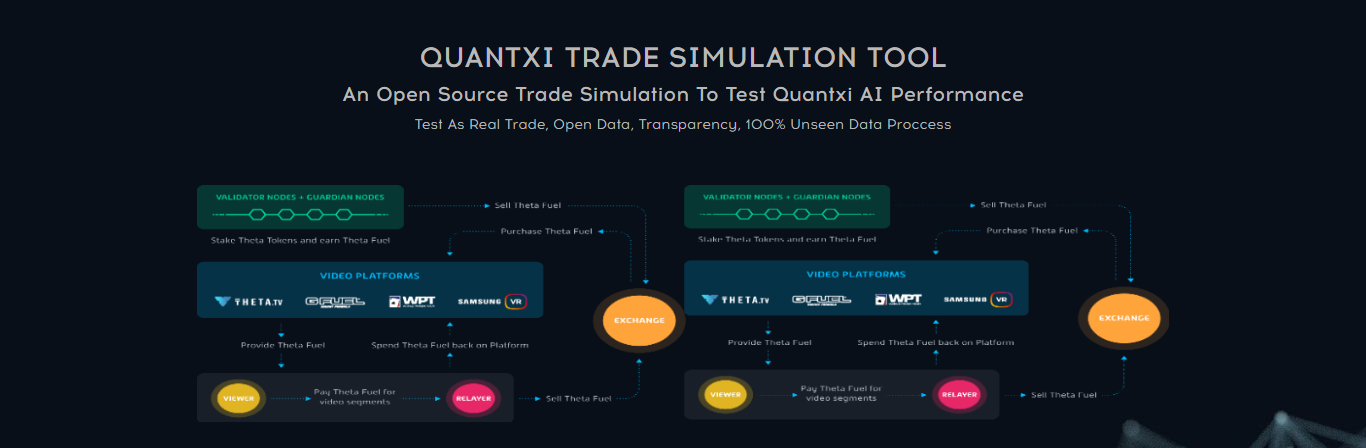

# **LIBRARY**

In [ ]:
!pip install yfinance

In [ ]:
pip install pandas_datareader

In [1]:
import getpass
import pandas as pd
import yfinance as yf
import panel as pn
import datetime
import requests
import datetime as dt
import numpy as np
import param
from pandas_datareader import data as pdr
# yf.pdr_override()
import progressbar
import sys
import ipywidgets as widgets
import time
from progressbar import ProgressBar, Percentage, GranularBar, Timer, ETA, Counter
pn.extension()
# import pytz
import random

<ipython-input-1-1ba5b87e27b7>:17: UserWarning: Using Panel interactively in Colab notebooks requires the jupyter_bokeh package to be installed. Install it with:

    !pip install jupyter_bokeh

and try again.
  pn.extension()


## **API** **KEY**

In [ ]:
API_Key = pn.widgets.PasswordInput(name='Input Your API Key', placeholder='Enter your password here...')
API_Key

PasswordInput(name='Input Your API Key', placeholder='Enter your password h...)

In [ ]:
response = requests.get(f"https://api.quantxi.com/user_profile?api_key={api_key}")
while response.json()['status'] == 'failed':
  print("Maaf API Key yang anda masukkan salah, coba di ulang lagi inputan api key anda diatas !!!")
if response.json()['status'] == 'success':
  print(f"Selamat Datang {response.json()['data']['user_name']}")

# **SETTING**

In [ ]:
initial_euqity = pn.widgets.FloatInput(name='Initial Equity', value=1000000, step=10000, start=1000000, end=100000000)
spread = pn.widgets.FloatInput(name='Spread', value=1e-2, step=1e-3, start=1e-2, end=5e-2)
commision = pn.widgets.FloatInput(name='Commision', value=1e-3, step=1e-4, start=1e-3, end=5e-2)
interest = pn.widgets.FloatInput(name='Interest', value=1e-2, step=1e-3, start=1e-2, end=5e-2)
data_setting = pn.WidgetBox('# DATA SETTING', initial_euqity, spread, commision, interest)
data_setting

WidgetBox
    [0] Markdown(str)
    [1] FloatInput(end=100000000, name='Initial Equity', start=1000000, step=10000, value=1000000)
    [2] FloatInput(end=0.05, name='Spread', start=0.01, step=0.001, value=0.01)
    [3] FloatInput(end=0.05, name='Commision', start=0.001, step=0.0001, value=0.001)
    [4] FloatInput(end=0.05, name='Interest', start=0.01, step=0.001, value=0.01)

# **DATA**

In [ ]:
select_data_source = pn.widgets.Select(name='Select Data Source', options=['EOD Hist Data', 'Tiingo', 'Alpha Vantage', 'Own Stock Data'])
select_data_source

Select(options=['EOD Hist Data', ...], value='EOD Hist Data')

In [ ]:
exchange = pn.widgets.Select(name='Select Exchange', options=['NASDAQ', 'NYSE', 'LSE', 'EURONEXT'])
exchange

In [ ]:
!pip install yfinance

In [ ]:
msft = yf.Ticker("MSFT")
hist = msft.history(period='max')
print(hist)

In [ ]:
df = pd.DataFrame(stockdata)
df.to_csv("/content/drive/MyDrive/{}.csv".format("all_tickerlist"))

In [24]:
#add data stock
portfolio = {"ticker":[],"data":[]}
ticker_list = list(map(str, input("Enter a multiple ticker, space separated (see ticker list at http://www.kompas.com) :").split()))
while len(ticker_list) < 30:
  print("maaf ticker anda tidak sampai 30, coba diulang")
  ticker_list = list(map(str, input("Enter a multiple ticker, space separated (see ticker list at http://www.kompas.com) :").split()))

while len(portfolio["ticker"]) < 30:
  r = random.randrange(0, len(ticker_list)-1)
  if ticker_list[r] not in portfolio["ticker"]:
    ticker_data = yf.Ticker(ticker_list[r]).history(period="max")
    ticker_data.index = pd.to_datetime(ticker_data.index).date
    if len(ticker_data) > 1000:
      portfolio["ticker"].append(ticker_list[r])
      portfolio["data"].append(ticker_data)
    else:
      print("maaf data ticker ",ticker_list[r]," tidak cukup data, minimal data 1000 baris")
print("Your Portfolio :",portfolio["ticker"])

Enter a multiple ticker, space separated (see ticker list at http://www.kompas.com) :083650.KQ 33J.BE CMU GQN2.SG QIN.HM SIX2.DE FLU.VI GEOS AARVEEDEN.NS ACJ.MU PHAL.ST TTNP ALLCARGO.BO ABAN.NS UOF.SG CALM ANP.L CTO TX ICIL.NS ACGL TZN.AX CAT KLR.L D05.SI 2360.TW XXT.SG MVF NRC.OL DF.TO AYCES.IS SNHO LLY.DE AG8.MU JE9N.F 001680.KS SKF-A.ST WIE.VI 119650.KS NNIC.F SIA1.F CEVI.ST ARI PRIM SULI.JK MUM.F AGV.MU JENBURPH.BO IZ1.SG CPT RATO-B.ST JMX.BE PBHC 7086.KL OCI1.MU AFA.AX ATS.L AC8.F ANDHRACEMT.BO BKSW.JK


ERROR:yfinance:$AGV.MU: possibly delisted; no timezone found


maaf data ticker  AGV.MU  tidak cukup data, minimal data 1000 baris


ERROR:yfinance:$AGV.MU: possibly delisted; no timezone found


maaf data ticker  AGV.MU  tidak cukup data, minimal data 1000 baris
Your Portfolio : ['RATO-B.ST', 'MVF', 'PBHC', 'MUM.F', 'CAT', 'SULI.JK', 'SNHO', 'CTO', 'ACJ.MU', 'AG8.MU', 'ATS.L', 'NNIC.F', 'AYCES.IS', 'ACGL', 'TTNP', 'XXT.SG', 'CALM', 'OCI1.MU', 'D05.SI', 'AARVEEDEN.NS', 'PRIM', 'SKF-A.ST', 'DF.TO', 'CPT', 'ANP.L', 'AFA.AX', 'ICIL.NS', 'PHAL.ST', '083650.KQ', 'SIX2.DE']


In [23]:
#cleaning and rekonstruk test data
start_date = dt.datetime(1900, 1, 1).date()
end_date = dt.datetime.now().date()
for i in range(len(portfolio["data"])):
  if portfolio["data"][i].index.max() < end_date:
    end_date = portfolio["data"][i].index.max()
  if portfolio["data"][i].index.min() > start_date:
    start_date = portfolio["data"][i].index.min()
run_date = start_date
idx = []
data = []

while run_date < end_date:
  data_array = {}
  for i in range(len(portfolio["data"])):
    if run_date in portfolio["data"][i].index:
      data_array[portfolio["ticker"][i]] = portfolio["data"][i]["Close"].loc[run_date]
    else:
      data_array[portfolio["ticker"][i]] = data[len(data)-1][portfolio["ticker"][i]]

  idx.append(run_date)
  data.append(data_array)

  if run_date.weekday() == 4:
    run_date = run_date + datetime.timedelta(days=3)
  else:
    run_date = run_date + datetime.timedelta(days=1)

test_data = pd.DataFrame(data,index=idx)
test_data.index.name = "date"
print(test_data)

               ICIL.NS       PBHC       ATS.L      AG8.MU     DF.TO  \
date                                                                  
2010-07-06    1.481362   2.886479  218.390335   19.414629  2.103723   
2010-07-07    1.407753   2.886479  219.331696   19.875088  2.103723   
2010-07-08    1.472160   2.886479  221.685028   20.025627  2.114794   
2010-07-09    1.536567   2.886479  222.155685   19.994637  2.150226   
2010-07-12    1.619376   2.886479  219.331696   19.906080  2.161299   
...                ...        ...         ...         ...       ...   
2024-08-21  385.549988  15.850000  380.000000  125.419998  5.230000   
2024-08-22  409.049988  15.850000  376.000000  127.379997  5.210000   
2024-08-23  415.799988  16.000000  381.000000  125.500000  5.280000   
2024-08-26  407.700012  15.800000  381.000000  125.019997  5.330000   
2024-08-27  422.549988  15.590000  386.000000  125.400002  5.310000   

                  CTO        NRC.OL       GEOS    OCI1.MU       PRIM  ...  \

In [ ]:
from time import sleep
from tqdm import tqdm
for i in tqdm(range(10)):
    sleep(1)

In [ ]:
pip install alive-progress

In [ ]:
from alive_progress import alive_bar
import time

for x in len(test_data), 1500:
   with alive_bar(x) as bar:
       for i in range(1000):
           time.sleep(.00005)
           bar()

In [ ]:
from sys import stdout
from time import sleep
i =0
while i < 7500:
    stdout.write("\r%d" % i)
    stdout.flush()
    sleep(0.01)
    i+=1
stdout.write("\n") # move the cursor to the next line

In [ ]:
from time import sleep
from tqdm import tqdm
import time
import sys

toolbar_width = 50

# setup toolbar
sys.stdout.write("[%s]" % (" " * toolbar_width))
sys.stdout.flush()
sys.stdout.write("\b" * (toolbar_width+1)) # return to start of line, after '['

# for i in tqdm(range(5)):
#     sleep(1)

time.sleep(0.1) # do real work here
sys.stdout.write("***")
sys.stdout.flush()
sys.stdout.write("]\n") # this ends the progress bar



In [ ]:
test_data = pd.DataFrame()
dff = []
idx = ["2021-07-26","2021-07-27","2021-07-28","2021-07-29",]

import time
import sys
for i in range(4):
  data2 = {
    portfolio["ticker"][0]:portfolio["data"][0]["Adj Close"].loc[idx[i]],
    portfolio["ticker"][1]:portfolio["data"][1]["Adj Close"].loc[idx[i]],
    portfolio["ticker"][2]:portfolio["data"][2]["Adj Close"].loc[idx[i]]
    }
  dff.append(data2)
  d = pd.DataFrame([data2],index=[idx[i]])
  df_ = d.copy()
  df_.columns = ['', '', '']
  # df_.index = ['' for _ in range(len(df))]
  # print(df_)
  time.sleep(0.5)
  print(f'\r', end=str(df_))
  # sys.stdout.write("\033[F") # Cursor up one line
  # print(d)
# print()

In [ ]:
df = pd.DataFrame([data2],
                  index=["circle"])
df

In [ ]:
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("SPY", start="2017-01-01", end="2017-04-30")['Adj Close']
print(data)

In [ ]:
# creating an empty list
lst = []
# iterating till the range
for i in range(0, 12):
    ele = input(prompt=f'Ticker{i+1} ')
    lst.append(ele) # adding the element
print(f"portfolio {lst}")

In [ ]:
msft = yf.Ticker("MSFT")
hist = msft.history(period="max")
print(hist)

if len(hist) == 0:
  print("no data")

In [ ]:
exchange = pn.widgets.Select(name='Select Exchange', options=['NASDAQ', 'NYSE', 'LSE', 'EURONEXT'])
exchange

Select(options=['NASDAQ', 'NYSE', ...], value='NASDAQ')

In [ ]:
if exchange.value == 'NASDAQ':
    ticker1 = pn.widgets.CrossSelector(name='Select Tickers', value=[], options=['A', 'B', 'C', 'D','E', 'F', 'G', 'H','I', 'J', 'K', 'L','M', 'N', 'O', 'P','Q', 'R', 'S', 'T','U', 'V', 'W', 'X'], size=8)
    display(ticker1)
elif exchange.value == 'NYSE':
    ticker1 = pn.widgets.CrossSelector(name='Select Tickers', value=[], options=['AAPL.US', 'AMD.US', 'AMZN.US', 'ATN.US'], size=8)
    display(ticker1)
elif exchange.value == 'LSE':
    ticker1 = pn.widgets.CrossSelector(name='Select Tickers', value=[], options=['AAPL3', 'AMD3', 'AMZN3', 'ATN3'], size=8)
    display(ticker1)
elif exchange.value == 'EURONEXT':
    ticker1 = pn.widgets.CrossSelector(name='Select Tickers', value=[], options=['AAPL4', 'AMD4', 'AMZN4', 'ATN4'], size=8)
    display(ticker1)
else:
  print("no exchange select")

CrossSelector(name='Select Tickers', options=['AAPL.US', 'AMD.US', ...], size=8)

In [ ]:
from eod import EodHistoricalData
api_key = '64faba4301ecc8.39402054'
client = EodHistoricalData(api_key)
urls=ticker1.value
for url in urls:
    print(url)#tdk perlu
    resp = client.get_prices_eod(url, period='d', order='a')
    df = pd.DataFrame(resp)
    df.to_csv("/content/sample_data/{}.csv".format(url))
    print(resp)#tdk perlu
#ini lsg muncul dataset

AAPL.US
[{'date': '2022-09-16', 'open': 151.21, 'high': 151.35, 'low': 148.37, 'close': 150.7, 'adjusted_close': 149.8113, 'volume': 162278800}, {'date': '2022-09-19', 'open': 149.31, 'high': 154.56, 'low': 149.1, 'close': 154.48, 'adjusted_close': 153.569, 'volume': 81474200}, {'date': '2022-09-20', 'open': 153.4, 'high': 158.08, 'low': 153.08, 'close': 156.9, 'adjusted_close': 155.9747, 'volume': 107689800}, {'date': '2022-09-21', 'open': 157.34, 'high': 158.74, 'low': 153.6, 'close': 153.72, 'adjusted_close': 152.8135, 'volume': 101696800}, {'date': '2022-09-22', 'open': 152.38, 'high': 154.47, 'low': 150.91, 'close': 152.74, 'adjusted_close': 151.8392, 'volume': 86652500}, {'date': '2022-09-23', 'open': 151.19, 'high': 151.47, 'low': 148.56, 'close': 150.43, 'adjusted_close': 149.5429, 'volume': 96029900}, {'date': '2022-09-26', 'open': 149.66, 'high': 153.77, 'low': 149.64, 'close': 150.77, 'adjusted_close': 149.8809, 'volume': 93339400}, {'date': '2022-09-27', 'open': 152.74, 'hi

In [ ]:
if len(ticker1.value) < 4:
  raise Exception("You dont have enough tickers")
else:
  df01 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df02 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df03 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df04 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df05 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df06 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df07 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df08 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df09 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df10 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df11 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df12 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df13 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df14 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df15 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df16 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df17 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df18 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df19 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df20 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df21 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df22 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df23 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df24 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df25 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df26 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df27 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df28 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df29 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")
  df30 = pd.read_csv(f"https://raw.githubusercontent.com/heriyang9000/mysys/main/dataset/NASDAQ/{ticker1.value[0]}.csv")

  print(df01.to_string())

In [ ]:
widgets.Combobox(
    # value='John',
    placeholder='Choose Someone',
    options=['Paul', 'John', 'George', 'Ringo'],
    description='Combobox:',
    ensure_option=True,
    disabled=False
)

Combobox(value='', description='Combobox:', ensure_option=True, options=('Paul', 'John', 'George', 'Ringo'), p…

In [ ]:
pn.extension()
progress = pn.indicators.Progress(name='Progress', value=20, width=200)
progress

Progress(value=20, width=200)

In [ ]:
pn.extension()

terminal = pn.widgets.Terminal(
    "Welcome to the Panel Terminal!\nI'm based on xterm.js\n\n",
    options={"cursorBlink": True},
    height=300, sizing_mode='stretch_width'
)

terminal


pn.extension('terminal')


pn.extension('terminal')



Terminal(id=139470619111104)

In [ ]:
pn.extension()
large_df = pd._testing.makeCustomDataframe(100, 5)

paginated_table = pn.widgets.Tabulator(large_df, disabled=True, pagination='remote', page_size=10)
paginated_table


pn.extension('tabulator')


pn.extension('tabulator')



Tabulator(disabled=True, page_size=10, pagination='remote', value=C0       C_l0_g0 C...)

In [ ]:
pn.extension()
df = pd.DataFrame({
    'int': [1, 2, 3],
    'float': [3.14, 6.28, 9.42],
    'str': ['A', 'B', 'C'],
    'bool': [True, False, True],
    'date': [dt.date(2019, 1, 1), dt.date(2020, 1, 1), dt.date(2020, 1, 10)]
}, index=[1, 2, 3])

df_widget = pn.widgets.Tabulator(df, disabled =True, configuration={"headerSort": False, "resizableColumns": False})
df_widget.servable()

Tabulator(disabled=True, value=   int  float s...)

In [ ]:
pn.extension()
json_obj = {
    'data_id': "00000",
    'timestamp': "mm/dd/yyy 00:00:00",
    'buying_power': "No Data",
    'stock01_price': "No Data",
    'stock02_price': "No Data",
    'stock03_price': "No Data",
    'stock04_price': "No Data",
    'stock05_price': "No Data",
    'stock06_price': "No Data",
    'stock07_price': "No Data",
    'stock08_price': "No Data",
    'stock09_price': "No Data",
    'stock10_price': "No Data",
    'stock11_price': "No Data",
    'stock12_price': "No Data",
    'stock13_price': "No Data",
    'stock14_price': "No Data",
    'stock15_price': "No Data",
    'stock16_price': "No Data",
    'stock17_price': "No Data",
    'stock18_price': "No Data",
    'stock19_price': "No Data",
    'stock20_price': "No Data",
    'stock21_price': "No Data",
    'stock22_price': "No Data",
    'stock23_price': "No Data",
    'stock24_price': "No Data",
    'stock25_price': "No Data",
    'stock26_price': "No Data",
    'stock27_price': "No Data",
    'stock28_price': "No Data",
    'stock29_price': "No Data",
    'stock30_price': "No Data"
}

json = pn.pane.JSON(json_obj, name='JSON', height=300, width=500)

json

JSON(dict, height=300, sizing_mode='fixed', width=500)

In [ ]:
pn.extension()
p1 = figure(width=300, height=300, name='Scatter', margin=5)
p1.scatter([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 2, 1, 0])

p2 = figure(width=300, height=300, name='Line', margin=5)
p2.line([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 2, 1, 0])

p3 = figure(width=300, height=300, name='Square', margin=5)
p3.square([0, 1, 2, 3, 4, 5, 6], [0, 1, 2, 3, 2, 1, 0], size=10)

# accordion.append(p3)
# accordion

GlyphRenderer(id='0cd6abb0-5366-4d75-b4f6-090ca4e3c8c3', ...)

In [ ]:
pn.extension()
number = pn.indicators.Number(
    name='Failure Rate', value=72, format='{value}%',
    colors=[(33, 'green'), (66, 'gold'), (100, 'red')]
)

pn.Row(number.clone(value=10), number.clone(value=42), number.clone(value=93))

Row
    [0] Number(colors=[(33, 'green'), ...], format='{value}%', name='Failure Rate', value=10)
    [1] Number(colors=[(33, 'green'), ...], format='{value}%', name='Failure Rate', value=42)
    [2] Number(colors=[(33, 'green'), ...], format='{value}%', name='Failure Rate', value=93)

In [ ]:
pn.extension()
data = {'x': np.arange(50), 'y': np.random.randn(50).cumsum()}

trend = pn.indicators.Trend(
    title='Price', data=data, width=200, height=200
)
trend
def stream_data():
    trend.stream({'x': [trend.data['x'][-1]+1], 'y': [trend.data['y'][-1]+np.random.randn()]}, rollover=50)

pn.state.add_periodic_callback(stream_data, period=250, count=100);
pn.Row(*(trend.clone(plot_type=pt) for pt in trend.param.plot_type.objects))

<ipython-input-30-b8c3043083eb>:4: PanelDeprecationWarning: 'title' is deprecated and will be removed in version 1.3, use 'name' instead.
  trend = pn.indicators.Trend(


Row
    [0] Trend(data={'x': array([ 0, ...}, height=200, name='Price', plot_type='line', width=200)
    [1] Trend(data={'x': array([ 0, ...}, height=200, name='Price', plot_type='step', width=200)
    [2] Trend(data={'x': array([ 0, ...}, height=200, name='Price', plot_type='area', width=200)
    [3] Trend(data={'x': array([ 0, ...}, height=200, name='Price', width=200)

In [ ]:
pn.extension()
date_range_slider = pn.widgets.DateRangeSlider(
    name='Date Range Slider',
    start=dt.datetime(2017, 1, 1), end=dt.datetime(2019, 1, 1),
    value=(dt.datetime(2017, 1, 1), dt.datetime(2018, 1, 10))
)

date_range_slider

DateRangeSlider(end=datetime.datetime(2019, ..., name='Date Range Slider', start=datetime.datetime(2017, ..., value=(datetime.datetime(2017, ..., value_end=datetime.datetime(2018, ..., value_start=datetime.datetime(2017, ...)

In [ ]:
from ipywidgets import Button
import asyncio

def wait_for_change(widget):
    future = asyncio.Future()
    def getvalue(change):
        future.set_result(change.description)
        widget.on_click(getvalue, remove=True)
        # we need to free up the binding to getvalue to avoid an InvalidState error
        # buttons don't support unobserve
        # so use `remove=True`
    widget.on_click(getvalue)
    return future

button = Button(description="wow")

list_to_tag = ["one", "two", "three", "four"]

async def f():
    for i in list_to_tag:
        print("going to tag {}".format(i))
        x = await wait_for_change(button)
        print("tagged {} with {}".format(i, x))
        print()

asyncio.create_task(f())
button

Button(description='wow', style=ButtonStyle())

going to tag one
tagged one with wow

going to tag two
tagged two with wow

going to tag three


In [ ]:
pn.extension()

df = pd.DataFrame({'int': [1, 2, 3], 'float': [3.14, 6.28, 9.42], 'str': ['A', 'B', 'C'], 'bool': [True, False, True]})

df_widget = pn.widgets.DataFrame(df, name='DataFrame')

df_widget

In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(
    header=dict(values=['A Scores', 'B Scores'],
                # line_color='darkslategray',
                # fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[[100, 90, 80, 90,100, 90, 80, 90,100, 90, 80, 90,100, 90, 80, 90,100, 90, 80, 90], # 1st column
                       [95, 85, 75, 95,95, 85, 75, 95,95, 85, 75, 95,95, 85, 75, 95,95, 85, 75, 95]], # 2nd column
              #  line_color='darkslategray',
              #  fill_color='lightcyan',
               align='left'))
])

fig.update_layout(width=400, height=350)
fig.show()

In [ ]:
import sched, time
s = sched.scheduler(time.time, time.sleep)
def do_something(sc):
    print("Doing stuff...")
    # do your stuff
    s.enter(60, 1, do_something, (sc,))

s.enter(60, 1, do_something, (s,))
s.run(

In [ ]:
import time
from time import sleep
starttime = time.time()
while True:
    print("tick")
    time.sleep(1.0 - ((time.time() - starttime) % 1.0))

In [ ]:
import time

def executeSomething():
    print("tick")
    time.sleep(1)

while True:
    executeSomething()

In [ ]:
#kode PILIHAN
import time
for i in range(5):
  members=["Niroshan","Brayan","Kate"]
  print("__________________________________________________________________")
  print('{:25s} {:32s} {:35s} '.format("Name","Country","Age"))
  print("__________________________________________________________________")
  print('{:25s} {:30s} {:5d} '.format(members[0],"Srilanka",i))
  print('{:25s} {:30s} {:5d} '.format(members[1],"Australia",i))
  print('{:25s} {:30s} {:5d} '.format(members[2],"England",i))
  print("__________________________________________________________________")
  # time.sleep(0.5)
  # print('\r', end='Data Input ->   :'+str(data1))
  # data2 = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
  # time.sleep(0.5)
  # print('\r', end='Signal Output <-:'+str(data2))
# print()


In [ ]:
#kode ini bagus dan jalan
import time
i=1
while i<7000:
      data1 = ["Request No: "+str(i)+", Buying Power: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]

      print('Data Input '+str(data1))
      data2 = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
      # time.sleep(0.01)
      print('Signal Output '+str(data2))

      print()
      i= i+1

In [ ]:
import sys
import time
for i in range(1000):
    w = 3.45768686
    z = 3456.49495969
    y = w*z/w*i
    print(y)
    # sys.stdout.write("\033[F") # Cursor up one line
    # time.sleep(1)

In [ ]:
import time
for i in range(7000):
    data = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
    print('Signal Input '+str(data))
    data = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
    print('Signal Output '+str(data))
    print()
    # time.sleep(0.05)
print()

In [ ]:
#kode ini bagus, cepat, recomended-1
import time
for i in range(7000):
    print(f"""{"Data Input=====>Request_ID: "+str(i)+", Buying_Power: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)}""")
    print(f"""{"Signal Output==>Response_ID: "+str(i)+", Signal_Timestamp: "+str(i)+", Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: "+str(i)}""")
    print("")
    # time.sleep(0.01)

In [ ]:
#kode ini bagus, cepat, recomended-1-try2
import time
for i in range(7000):
    print(f"""{"Data Input=====>Request_ID: "+str(i)+", Stock1_Price: "+str(i)+", Stock1_PositionSize: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)}""")
    print(f"""{"Signal Output==>Response_ID: "+str(i)+", Stock1_SignalSize: "+str(i)+", Stock1_SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: BUY , Stock1 SignalSize: "+str(i)+", Stock1 SignalPosition: "+str(i)}""")
    print("")
    time.sleep(0.01)

In [ ]:
for i in range(20):
    print("Loading" + "." * i)
    # doSomeTimeConsumingProcessing()

    sys.stdout.write("\033[F") # Cursor up one lin

In [ ]:
import time

i = 0

goback = "\033[F" * 5  # ? this "climbs you back up 5 lines" at the next
                       # iteration, output at same spot, like `top`


for i in range(0, 9):
    print(f"""
          {i} {i} {i} {i} {i}
          {i} {i} {i} {i} {i}
          {i} {i} {i} {i} {i}
          {i} {i} {i} {i} {i} """)
    print("\033[F")
    time.sleep(1)


In [ ]:
import sys
import time

for i in range(100):
    # data = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
    #  print('\r', end='Signal Output '+str(data))
    sys.stdout.write("\r" + "Signal Output "+str(data))
    print('This is my first line', 'And this is the second line', end='')
    time.sleep(0.01)
    # sys.stdout.flush()
print()

In [ ]:
import time
for i in range(7000):
      time.sleep(0.01)
      print("""
      '\r', end='Data Input1 '+str('{0:.3g}'.format((i/7000)*100))+' %'
      '\r', end='Data Input2 '+str('{0:.3g}'.format((i/7000)*100))+' %'
      """)
      # print('\r', end='Data Input1 '+str('{0:.3g}'.format((i/7000)*100))+' %')
      # print('\r', end='Data Input2 '+str('{0:.3g}'.format((i/7000)*100))+' %')

In [ ]:
print("""
Line1
Line2
""")


Line1
Line2



In [ ]:
# KODE PILIHAN
from tabulate import tabulate
# import time
# import sys
print(tabulate([['Alice', 29], ['Bob', 30]], headers=['Name', 'Age']))
for x in range(7000):
  data = [['Data Input',x, x, x, x], ['Signal Output',x, x, x, x]]
  # time.sleep(0.01)
  print('\r', end=tabulate(data))
  # print('\r', end=tabulate(data))


In [ ]:
import json
import time
for x in range(1000):
  your_json = '["foo", {"bar":["baz", '+str(x)+', 1.0, 2]}]'
  parsed = json.loads(your_json)
  time.sleep(1)
  print(end=json.dumps(parsed, indent=4, sort_keys=True))

In [ ]:
from tabulate import tabulate
import time
for x in range(100):
  all_data = [["Roll Number","Student name","Marks"],
              [1,"Sasha",str(x)],
              [2,"Richard",36],
              [3,"Judy",20],
              [4,"Lori",39],
              [5,"Maggie",40]]
  table1 = tabulate(all_data)
  table2 = tabulate(all_data,headers='firstrow')
  time.sleep(1)
  print('\r',end=table1)
  time.sleep(1)
  print('\r',end=table2)

In [ ]:
pip install localStoragePy

In [ ]:
from localStoragePy import localStoragePy
localStorage = localStoragePy('colab', 'sqlite')
localStorage.setItem('user', 'heri')

In [ ]:
localStorage.getItem('user')

'heri'

In [ ]:
pip install selenium

In [ ]:
from selenium import webdriver
driver = webdriver.Firefox()
url='https://heriyang9000.github.io/'
driver.get(url)
scriptArray="""localStorage.setItem("key1", 'new item');
               localStorage.setItem("key2", 'second item');
				return Array.apply(0, new Array(localStorage.length)).map(function (o, i) { return localStorage.getItem(localStorage.key(i)); }
				)"""
result = driver.execute_script(scriptArray)
print(result)

In [ ]:
import csv
import numpy as np
import yfinance as yf

In [ ]:
#KODE BAGUS UNTUK DOWNLOAD DATA
import yfinance as yf
urls=["0NTI.L","G5A.SG","PYT.VI","0NF.F","OTV.VI","6507.TWO","0QKI.L","CASN.SW","JVLAGRO.NS","3CL.F","ATFL.BO","SPI.VI","AMPH.L","AGRODUTCH-BE.NS","RKB.BO","JZ1.SG","DG6.HM","SHPNE.SW","POS.VI","AZ2.DE","AGU.BE","7KT.HM","UBSN.MX","ILM1.DU","0GC8.L","AGV.V","4A4B.F","AGY.V","0QLR.L","SIN.SW","1RA1.F","EMAE4.SA","DDM.ST","0QMA.L","MDG1.DE","TA1.DE","FORNE.SW","0QMV.L","NEPCAGRO.BO","0RBM.L","STRN.SW","AGU.F","AGT.SG","WIB.BE","TWIROST.BO","CNWK.DE","INAG.BA","0MV2.L","COTN.SW","0AL.F","AGU.SG","VITANAGRO.BO","KUNN.SW","MMH.HM","0FJC.L","S3F.DE","SO6N.SG","IIKP.JK","0QPY.L","KARN.SW","AGARIND.BO","EK7.MU","SW1.DE","0QO1.L","H8K.DE","CLADD","0NKL.L","RWEA.SG","KGNAGRO.BO","RGRA","SFD1.DE","AG5.SG","B7Z.BE","NAPL.BO","AJ81.F","M4N.DE","0G15.L","0QK3.L","HSRN.HM","0QMO.L","GATE.SW","IKH.DE","PAL.DE","VZN.SW","I3H.SG","0QUW.L","REIAGROLTD.NS","0J04.L","0QNE.L","0EW1.L","SMPLXTR.BO","0QNG.L","HUE.SW","0NDV.L","7KT.SG","2BU.F","AGV.MU","0QQ6.L","0OQX.L","PALM.JK","AGS.SI","A35.F","8WP.F","AG8.SG","AGX.F","EMH1.DE","2BU.BE","52BA.SG","SH-ANJY.BO","0NZ7.L","A3J.F","WARN.SW","KEBA.F","WL6J.DE","LNZ.VI","AG4.F","IC8.DE","AGG.AX","0P3F.L","GAFL-CRA1DL1.SA","AGRU-DEB210B.SA","0NIR.L","NATNLSTEEL.NS","GAFL-CRA11L0.SA","AGVE6L.SA","0MJ9.L","MAISF.BO","MA1.DE","EP1.BE","0MPM.L","IHA.F","0QFR.L","0GJK.L","8AP.SG","0GVE.L","KOMN.SW","0QW9.L","VALN.SW","AHLUCONT.BO","AHU.V","AHT-PA","AHS.V","AHLWEST.NS","AHL.AX","AHL-PA","AHD.AX","AHOF.DU","AHMEDFORG.NS","AHURAWE.BO","7315@BN.KL","AHEB3.SA","AHIMSA-SO.NS","AH2N.SG","AHIMSA-SQ.NS","AHR.BE","AHC.BK","AH2N.BE","AHG1.F","AHIMSA-SM.NS","AHP.V","AHE.DU","AHC.V","AH2N.F","AHE.F","AHR.V","AHLWEST.BO","AH-R.BK","AH.TI","MFK1.BE","AHOLA.HE","AHG.AX","AHO-H.V","AHR.F","AHLA.HM","AHLA.BE","AHY.AX","AHLEAST.BO","OC3.HM","AHL.BE","AHEB3F.SA","AHE.SG","AHX.AX","AHIMSA-SL.NS","AH.BK","AHQ.AX","AHEB6.SA","A7Q1.SG","AHIMSA-SP.NS","AHOF.SG","AHK.AX","AHQ.F","AHT-PD","AHV.MU","AHEB5.SA","AHC.MU","AHEB5F.SA","AHV.F","AHLUCONT.NS","A7Q1.F","AHLEAST.NS","AHIMSA-SI.NS","FENER.IS","AHF.AX","AHC.BE","AHN.MX","AH9.F","AHMDSTE.BO","AH9.BE","AHO.MI","AHC-R.BK","AHIMSA-ST.NS","CAM.MC","AHL1V.HE","AHN.AX","3SQ1.HM","7315.KL","AHC.SG","AHR.AX","AHOF.HM","AHG1.DE","C6L.SI","AIV-PZ","AII.V","AIF.TO","AIEA.L","AI.TO","MJP.AX","IQ.V","INR.BE","IAG.MC","GOLL4.SA","G7V.F","ELAL.TA","CTY.MU","AIXB.DE","AIX.V","AIW.MU","AIRA.DE","AIR.HM","AIR.F","AIR.DE","AIQ.AX","AIMS.JK","AIM-PC.TO","AIM-PA.TO","AIL.F","AIL.DE","AICHAMP.NS","AIAENG.NS","AIA.NZ","4609.TWO","TAXA4L.SA","SDA.SG","MAXM.TA","NCA2.L","TAXA161.SA","TAXA17.SA","TAXA63.SA","AIG-WT","TAXA106.SA","TAXA345.SA","AIR.MC","TAXA129.SA","5099@BN.KL","AIMLBBPH.BO","TAXA303.SA","TAXA310.SA","EFORL.BK","TAXA210.SA","TAXA35.SA","TAXA59.SA","OYC.MU","TAXA19.SA","MJS.F","TAXA31L.SA","S64.BE","TAXA20L.SA","RJC.F","S64.SG","AIL.HA","AIO.AX","A1G.SG","TAXA148.SA","TO2.AX","TAXA22.SA","TAXA143.SA","TAXA302.SA","TAXA47.SA","AIXA.SW","TAXA212.SA","TAXA295.SA","TAXA74.SA","TAXA50.SA","TAXA165.SA","TAXA58L.SA","TAXA260.SA","TAXA32.SA","HHV.L","TAXA123.SA"]

for url in urls:
    tickerTag = yf.download(url, period="max")
    # hist = tickerTag.history(period="max")

    if len(tickerTag) > 0:
      tickerTag.to_csv("/content/drive/MyDrive/data_tick3/{}.csv".format(url))
    # print(tickerTag)



In [ ]:
#import external pandas_datareader library with alias of web
import pandas_datareader as web

#import datetime internal datetime module
#datetime is a Python module
import datetime

#datetime.datetime is a data type within the datetime module
start = datetime.datetime(2017, 9, 1)
end = datetime.datetime(2017, 12, 31)

#DataReader method name is case sensitive
df = web.DataReader("nvda", 'yahoo', start, end)

#invoke to_csv for df dataframe object from
#DataReader method in the pandas_datareader library

#..\first_yahoo_prices_to_csv_demo.csv must not
#be open in another app, such as Excel

df.to_csv('first_yahoo_prices_volumes_to_csv_demo.csv')

In [ ]:
from google.colab import files
folder.download('/content/sample_data')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tqdm

In [ ]:
from tqdm.notebook import tqdm
from time import sleep

In [ ]:
# import time
number_list = list(range(7000))
# print(number_list)
for x in tqdm(number_list):
  # for i in range(7000):
  #   data1 = ["Request No: "+str(i)+", Buying Power: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
  #   sleep(0.5)
  #   print('\r', end='Data Input '+str(data1))
  #   data2 = ["Response No: "+str(i)+", Signal Timestamp: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)+", Stock1 Price: "+str(i)+", Stock1 Position Size: "+str(i)]
  #   sleep(0.5)
  #   print('\r', end='Signal Output '+str(data2))
  sleep(0.01)
print("Completed!")

In [ ]:
members=["Niroshan","Brayan","Kate"]
print("__________________________________________________________________")
print('{:25s} {:32s} {:35s} '.format("Name","Country","Age"))
print("__________________________________________________________________")
print('{:25s} {:30s} {:5d} '.format(members[0],"Srilanka",20))
print('{:25s} {:30s} {:5d} '.format(members[1],"Australia",25))
print('{:25s} {:30s} {:5d} '.format(members[2],"England",30))
print("__________________________________________________________________")

__________________________________________________________________
Name                      Country                          Age                                 
__________________________________________________________________
Niroshan                  Srilanka                          20 
Brayan                    Australia                         25 
Kate                      England                           30 
__________________________________________________________________


In [ ]:
import requests
import json
import time
import pandas as pd

# Modify BASE_URL accordingly
BASE_URL = "https://finance.yahoo.com/screener/unsaved/a8d324cf-35c3-492f-8dc2-df33f8f4dc69?dependentField=sector&dependentValues=&offset=OFFSET&count=COUNT"

cnt = 100
offset = 0
flag = 1
temp  = 10
name_to_symbol = []
total = 0

while flag > 0:
    url = BASE_URL.replace("OFFSET", str(offset))
    url = url.replace("COUNT",str(cnt))
    offset += cnt

    response = requests.get(url, headers={'User-Agent': 'Custom'})
    s = str(response.text)
    jsonArrayStart = s.find('"results":{"rows"') + 18
    jsonArrayEnd = jsonArrayStart + 1

    while s[jsonArrayEnd] != ']':
        jsonArrayEnd += 1

    jsonArrayString = s[jsonArrayStart: jsonArrayEnd+1]
    jsonArray = json.loads(jsonArrayString)
    if len(jsonArray) != cnt:
        flag = 0

    total += len(jsonArray)
    for obj in jsonArray:
        if 'longName' in obj:
            name_to_symbol.append([obj['symbol'], obj['longName']])
        elif 'shortName' in obj:
            name_to_symbol.append([obj['symbol'], obj['shortName']])
        else:
            name_to_symbol.append([obj['symbol'], obj['symbol']])
    time.sleep(10)

name_to_symbol

pd.DataFrame(name_to_symbol).to_csv("united_kingdom.csv")


In [ ]:
import pandas as pd
from pandas_datareader import data
import numpy as np, numpy.random
from numpy import mean
import random
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.stats import norm
from scipy.stats import kstest
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy import stats
def extract_prices(start_date,end_date,symbols,backtestduration=0):
    dim=len(symbols)
    for symbol in symbols:
        dfprices = data.DataReader(symbols, start=start_date, end=end_date, data_source='yahoo')
        dfprices = dfprices[['Adj Close']]
    dfprices.columns=[' '.join(col).strip() for col in dfprices.columns.values]
    for i in range(0,len(symbols)):
        noOfShares.append(portfolioValPerSymbol[i]/priceAtEndDate[i])
    noOfShares=[round(element, 5) for element in noOfShares]
    listOfColumns=dfprices.columns.tolist()
    dfprices["Adj Close Portfolio"]=dfprices[listOfColumns].mul(noOfShares).sum(1)

    print(f"Extracted {len(dfprices)} days worth of data for {len(symbols)} counters with {dfprices.isnull().sum().sum()} missing data")

    return dfprices

In [ ]:
def calc_returns(dfprices,symbols):
    dfreturns=pd.DataFrame()
    columns = list(dfprices)
    mean=[]
    stdev=[]
    for column in columns:
        dfreturns[f'Log Daily Returns {column}']=np.log(dfprices[column]).diff()
        mean.append(dfreturns[f'Log Daily Returns {column}'][1:].mean())
        stdev.append(dfreturns[f'Log Daily Returns {column}'][1:].std())
    dfreturns=dfreturns.dropna()

    if len(dfreturns.columns)==1:
        df_mean_stdev=pd.DataFrame(list(zip(symbols,mean,stdev)),columns =['Stock', 'Mean Log Daily Return','StdDev Log Daily Return'])
    else:
        df_mean_stdev=pd.DataFrame(list(zip(symbols+["Portfolio"],mean,stdev)),columns =['Stock', 'Mean Log Daily Return','StdDev Log Daily Return'])

    return dfreturns ,df_mean_stdev

In [ ]:
def GBMsimulatorUniVar(So, mu, sigma, T, N):
    """
    Parameters
    So:     initial stocks' price
    mu:     expected return
    sigma:  volatility
    Cov:    covariance matrix
    T:      time period
    N:      number of increments
    """
    dim = np.size(So)
    t = np.linspace(0., T, int(N))
    S = np.zeros([dim, int(N)])
    S[:, 0] = So
    for i in range(1, int(N)):
        drift = (mu - 0.5 * sigma**2) * (t[i] - t[i-1])
        Z = np.random.normal(0., 1., dim)
        diffusion = sigma* Z * (np.sqrt(t[i] - t[i-1]))
        S[:, i] = S[:, i-1]*np.exp(drift + diffusion)
    return S, t

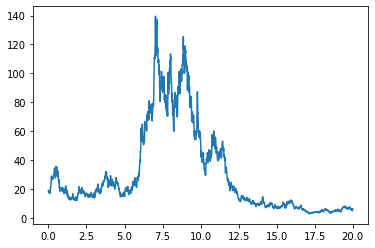

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

T = 20
mu = 0.1
sigma = 0.5
S0 = 20
dt = 0.01
N = round(T/dt)
t = np.linspace(0, T, N)
W = np.random.standard_normal(size = N)
W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
X = (mu-0.5*sigma**2)*t + sigma*W
S = S0*np.exp(X) ### geometric brownian motion ###
plt.plot(t, S)
plt.show()

In [ ]:
pip install stocksymbol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from stocksymbol import StockSymbol

api_key = 'a9f82975-b7fb-4f7c-b3c3-8510831b9ca5'
ss = StockSymbol(api_key)

In [ ]:
symbol_only_list = ss.get_symbol_list(market="america", symbols_only=True)
symbol_only_list

In [ ]:
market_list = ss.market_list

market_list

In [ ]:
import requests

params = {
  'access_key': '3d120122d28764e5c730f2e1963181ca'
}

api_result = requests.get('http://api.marketstack.com/v1/tickers/JAT.XFRA/eod', params)

api_response = api_result.json()

print(api_response['data']['eod'])


In [ ]:
pip install eod

In [ ]:
from eod import EodHistoricalData
# create the instance of the SDK
api_key = '64faba4301ecc8.39402054'
client = EodHistoricalData(api_key)

In [ ]:
import pandas as pd
urls=["ABBV.NEO","ABST.TO"]
for url in urls:
    resp = client.get_prices_eod(url, period='d', order='a')
    df = pd.DataFrame(resp)
    df.to_csv("/content/sample_data/{}.csv".format(url))
    print(resp)

[{'date': '2022-11-25', 'open': 23.83, 'high': 23.83, 'low': 23.69, 'close': 23.69, 'adjusted_close': 23.2565, 'volume': 1525}, {'date': '2022-11-28', 'open': 23.85, 'high': 23.87, 'low': 23.48, 'close': 23.48, 'adjusted_close': 23.0504, 'volume': 2683}, {'date': '2022-11-29', 'open': 23.51, 'high': 23.51, 'low': 23.42, 'close': 23.49, 'adjusted_close': 23.0602, 'volume': 1815}, {'date': '2022-11-30', 'open': 23.4, 'high': 23.83, 'low': 23.4, 'close': 23.83, 'adjusted_close': 23.394, 'volume': 372}, {'date': '2022-12-01', 'open': 23.9, 'high': 24.01, 'low': 23.9, 'close': 24.01, 'adjusted_close': 23.5707, 'volume': 917}, {'date': '2022-12-02', 'open': 23.96, 'high': 24.23, 'low': 23.9, 'close': 24.23, 'adjusted_close': 23.7866, 'volume': 658}, {'date': '2022-12-05', 'open': 24.3, 'high': 24.35, 'low': 24.3, 'close': 24.3, 'adjusted_close': 23.8554, 'volume': 2161}, {'date': '2022-12-06', 'open': 24.36, 'high': 24.36, 'low': 24.13, 'close': 24.16, 'adjusted_close': 23.7179, 'volume': 45

In [ ]:
input1 = pn.widgets.FloatInput(name='Input1', value=5., step=1e-1, start=0, end=1000)
input1

FloatInput(end=1000, name='Input1', start=0, value=5.0)

In [ ]:
input1.value

5.0

In [ ]:
import math
import panel as pn
pn.extension()

In [ ]:
w1 = pn.widgets.FloatInput(name='Input1', value=5., step=1e-1, start=0, end=1000)
w2 = pn.widgets.FloatInput(name='Input2', value=5., step=1e-1, start=0, end=1000)
w3 = pn.widgets.FloatInput(name='Input3', value=5., step=1e-1, start=0, end=1000)
w4 = pn.widgets.FloatInput(name='Input4', value=5., step=1e-1, start=0, end=1000)
w5 = pn.widgets.RangeSlider(name='Range Slider', start=0, end=math.pi, value=(math.pi/4., math.pi/2.), step=0.01)
box = pn.WidgetBox('# DATA SETTING', w1, w2, w3, w4, w5)
box

WidgetBox
    [0] Markdown(str)
    [1] FloatInput(end=1000, name='Input1', start=0, value=5.0)
    [2] FloatInput(end=1000, name='Input2', start=0, value=5.0)
    [3] FloatInput(end=1000, name='Input3', start=0, value=5.0)
    [4] FloatInput(end=1000, name='Input4', start=0, value=5.0)
    [5] RangeSlider(end=3.141592653589793, name='Range Slider', step=0.01, value=(0.7853981633974483, ..., value_end=1.5707963267948966, value_start=0.7853981633974483)

In [ ]:
w1.value * w2.value

23.52

In [ ]:
checkbox_group = pn.widgets.CheckBoxGroup(
    name='Checkbox Group', value=[], options=['Apple', 'Banana', 'Pear', 'Strawberry'],
    inline=True)

checkbox_group

CheckBoxGroup(inline=True, name='Checkbox Group', options=['Apple', 'Banana', ...])

In [ ]:
checkbox_group.value

['Apple', 'Banana', 'Pear']

In [ ]:
API_Key = pn.widgets.PasswordInput(name='Input Your API Key', placeholder='Enter your password here...')
API_Key

PasswordInput(name='Input Your API Key', placeholder='Enter your password h...)

In [ ]:
API_Key.value

'ksmkkmdkmkmdkmkmkmd'

In [ ]:
multi_choice = pn.widgets.MultiChoice(name='MultiSelect', value=[], options=['Apple', 'Banana', 'Pear', 'Strawberry'])

pn.Column(multi_choice, height=400)


Column(height=400)
    [0] MultiChoice(name='MultiSelect', options=['Apple', 'Banana', ...])